# Описание проекта
Сравнение моделей обучения при множественом прогнозировании

## Цель
Используя данные Train_Data создать модель, нацеленную на прогнозирование значений параметров Target_1...4 по значениям Tag_1...79.
После получения модели применить ее к тестовой выборке представленной в архиве Test_data и на основании значений Tag_1...79 получить прогнозы для параметров Target_1...4.
Полученные прогнозы и топ-10 значимых тэгов направить в качестве результата в ответном письме.

In [1]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link_1 = 'https://drive.google.com/file/d/1L07Wg-pn3FdS9FPshDKa-ytSufQNl0/view?usp=sharing'

import pandas as pd
import numpy as np
  
# to get the id part of the file
id = link_1.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_data.csv')  
  
train_data = pd.read_csv('train_data.csv')


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

In [3]:
link_2 = 'https://drive.google.com/file/d/1zYxOAY-JRFOyQrLPKv1d2vdWUHAMp9/view?usp=sharing'

import pandas as pd
  
# to get the id part of the file
id = link_2.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_data.csv')  
  
test_data = pd.read_csv('test_data.csv')


In [4]:
# Display up to 90 columns of a dataframe
pd.set_option('display.max_columns', 90)


In [5]:
#display top of train df
train_data.head(10)

,Unnamed: 0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,tag22,tag23,tag24,tag25,tag26,tag27,tag28,tag29,tag30,tag31,tag32,tag33,tag34,tag35,tag36,tag37,tag38,tag39,tag40,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50,tag51,tag52,tag53,tag54,tag55,tag56,tag57,tag58,tag59,tag60,tag61,tag62,tag63,tag64,tag65,tag66,tag67,tag68,tag69,tag70,tag71,tag72,tag73,tag74,tag75,tag76,tag77,tag78,tag79,target1,target2,target3,target4
0,2016-08-18 00:00:00,15.78042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.30402,60.01311,-0.001269,0.018163,-0.000183,0.000671,0.000956,0.000858,0.000992,NaN,19.26714,22.33068,15.60123,80.97660,22.33527,33.87122,24.00339,57.06384,44.54309,23.80796,27.63220,47.27997,23.96099,23.94522,26.39192,47.87158,37.12356,36.37045,NaN,67.60985,NaN,NaN,19.70473,164.9857,NaN,NaN,NaN,183.3191,206.6534,69.99840,NaN,NaN,50.50632,46.30415,61.20765,72.77773,25.30402,60.01311,2.373747,0.677581,2.775156,1.769055,2.766034,2.794747,33.42513,34.27024,39.65590,44.48986,50.34106,37.34515,53.65030,50.70506,61.08673,72.76518,53.02723,66.30531,55.10297,73.65612,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-08-18 00:01:00,15.80157,NaN,NaN,NaN,NaN,NaN,53.06440,NaN,NaN,25.30464,60.01566,-0.001289,0.018208,-0.000210,0.000670,0.000947,0.000857,0.001003,25.31277,19.26205,22.35979,15.61021,80.98914,22.33696,33.89564,23.99264,57.05022,44.49367,23.81503,27.63496,47.27994,23.97050,23.93777,26.40619,47.86334,37.09820,36.26917,NaN,NaN,NaN,NaN,19.77348,164.1665,NaN,NaN,NaN,185.1547,205.3378,69.98409,NaN,NaN,50.49541,46.20826,61.20348,72.76062,25.30464,60.01566,2.373543,0.677852,2.775152,1.769295,2.766190,2.794963,33.41073,34.25732,39.70995,44.46941,50.31259,37.34732,53.65897,50.60955,61.09685,72.76947,53.05109,66.30098,55.11534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-08-18 00:02:00,15.68913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.30486,60.01267,-0.001310,0.018185,-0.000146,0.000663,0.000957,0.000855,0.001004,NaN,19.26793,22.38500,15.59624,80.94573,22.33768,33.91651,23.98789,57.04745,44.52599,23.81206,27.63683,47.24675,23.96895,23.92040,26.36558,47.87779,37.10657,36.28939,91.98822,67.92857,NaN,NaN,19.77574,166.6839,NaN,NaN,NaN,185.7857,206.4609,70.04832,NaN,NaN,50.49607,46.24781,61.20309,72.76160,25.30486,60.01267,2.373388,0.677734,2.775619,1.768982,2.766650,2.795123,33.41452,34.23959,39.74942,44.45711,50.31557,37.32831,53.66189,50.60200,61.05627,72.75539,53.06495,66.30359,55.09395,NaN,NaN,55.07365,NaN,NaN,NaN,NaN
3,2016-08-18 00:03:00,15.75101,NaN,20.26209,NaN,NaN,NaN,52.95166,NaN,NaN,25.30544,60.01596,-0.000885,0.018180,-0.000192,0.000672,0.000949,0.000864,0.001003,NaN,19.24153,22.34216,15.60701,80.93867,22.33434,33.98246,23.98795,57.05103,44.51584,23.80859,27.62737,47.26019,23.94341,23.91153,26.39959,47.91307,37.14546,36.27222,NaN,NaN,37.1847,NaN,19.80556,163.1378,NaN,NaN,NaN,182.6789,207.5279,69.95206,37.13296,NaN,50.51320,46.13975,61.28067,72.77470,25.30544,60.01596,2.385501,0.678970,2.775364,1.769024,2.766515,2.795122,33.40705,34.23381,39.79846,44.47630,50.28574,37.30737,53.67104,50.68343,61.00186,72.77387,53.06760,66.28421,55.12513,NaN,92.46913,NaN,NaN,NaN,NaN,NaN
4,2016-08-18 00:04:00,15.57773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.30540,60.01478,-0.001005,0.018167,-0.000113,0.000678,0.000955,0.000865,0.001013,NaN,19.25176,22.33690,15.60543,80.97723,22.33530,34.05027,23.98389,57.05997,44.51775,23.76636,27.64237,47.20809,23.93508,23.90270,26.37914,47.93106,37.13568,36.26667,NaN,NaN,NaN,NaN,19.79632,166.8106,NaN,NaN,NaN,186.6251,NaN,69.99007,NaN,NaN,50.50373,46.33209,61.28010,72.72731,25.30540,60.01478,2.385056,0.678937,2.775762,1.769598,2.766815,2.795541,33.37688,34.22705,39.81411,44.48069,50.23417,37.30698,53.58812,50.64983,61.04366,72.72121,53.09679,66.26472,55.15526,73.67016,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-08-18 00:05:00,15.57733,NaN,NaN,NaN,NaN,NaN,52.95227,47.23787,NaN,25.30587,60.01845,-0.001210,0.018178,-0.000139,0.000681,0.000963,0.000861,0.000998,NaN,19.24396,22.37078,15.59140,80.97195,22.327

In [6]:
# display train_data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 84 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  200000 non-null  object 
 1   tag1        199934 non-null  float64
 2   tag2        109370 non-null  float64
 3   tag3        109456 non-null  float64
 4   tag4        85 non-null      float64
 5   tag5        9736 non-null    float64
 6   tag6        373 non-null     float64
 7   tag7        88122 non-null   float64
 8   tag8        16777 non-null   float64
 9   tag9        407 non-null     float64
 10  tag10       199837 non-null  float64
 11  tag11       199867 non-null  float64
 12  tag12       199875 non-null  float64
 13  tag13       199875 non-null  float64
 14  tag14       199875 non-null  float64
 15  tag15       199875 non-null  float64
 16  tag16       199875 non-null  float64
 17  tag17       199875 non-null  float64
 18  tag18       199875 non-null  float64
 19  ta

In [7]:
# display train_data columns list
train_data.columns

Index(['Unnamed: 0', 'tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7',
       'tag8', 'tag9', 'tag10', 'tag11', 'tag12', 'tag13', 'tag14', 'tag15',
       'tag16', 'tag17', 'tag18', 'tag19', 'tag20', 'tag21', 'tag22', 'tag23',
       'tag24', 'tag25', 'tag26', 'tag27', 'tag28', 'tag29', 'tag30', 'tag31',
       'tag32', 'tag33', 'tag34', 'tag35', 'tag36', 'tag37', 'tag38', 'tag39',
       'tag40', 'tag41', 'tag42', 'tag43', 'tag44', 'tag45', 'tag46', 'tag47',
       'tag48', 'tag49', 'tag50', 'tag51', 'tag52', 'tag53', 'tag54', 'tag55',
       'tag56', 'tag57', 'tag58', 'tag59', 'tag60', 'tag61', 'tag62', 'tag63',
       'tag64', 'tag65', 'tag66', 'tag67', 'tag68', 'tag69', 'tag70', 'tag71',
       'tag72', 'tag73', 'tag74', 'tag75', 'tag76', 'tag77', 'tag78', 'tag79',
       'target1', 'target2', 'target3', 'target4'],
      dtype='object')

In [8]:
# display date values 
train_data['Unnamed: 0'].value_counts()

2016-09-16 04:47:00    1
2016-08-18 14:52:00    1
2016-12-11 22:59:00    1
2016-12-19 21:11:00    1
2016-11-21 04:02:00    1
                      ..
2016-09-17 17:55:00    1
2016-09-09 21:39:00    1
2016-11-18 01:23:00    1
2016-08-29 23:08:00    1
2016-12-17 18:58:00    1
Name: Unnamed: 0, Length: 200000, dtype: int64

In [9]:
# drop some rows and columns
train_data.dropna(axis=0, subset = ['target1','target2','target3','target4'], inplace = True)
train_data =train_data.drop(columns = ['Unnamed: 0'])
train_data.name = 'train_data'
test_data = test_data.drop(columns = ['Unnamed: 0'])
test_data.name = 'test_data'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

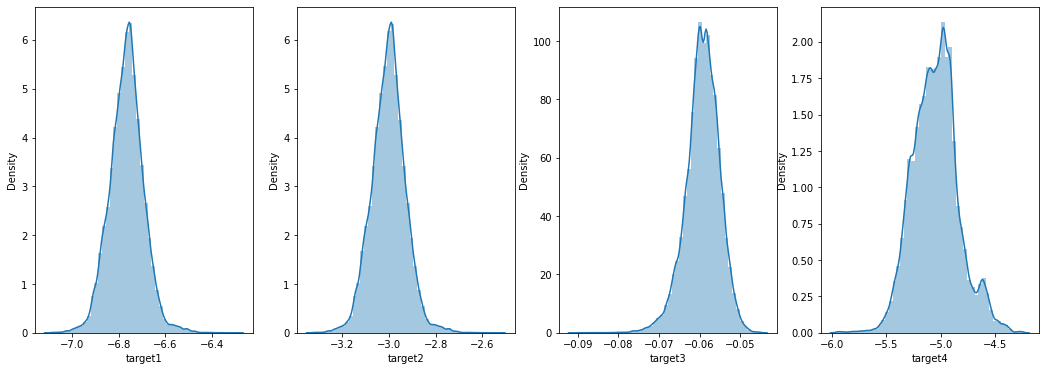

In [12]:
# check detribution of the targets to proof their linear nature
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(18,6))

sns.distplot(np.log(train_data['target1']),ax=axs[0])
sns.distplot(np.log(train_data['target2']),ax=axs[1])
sns.distplot(np.log(train_data['target3']),ax=axs[2])
sns.distplot(np.log(train_data['target4']),ax=axs[3])


In [13]:
# Function to calculate missing values by column
def missing_values_table(data):
        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected " + data.name + " has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
# find missing values in all columns
missing_values_table(train_data)

Your selected train_data has 83 columns.
There are 79 columns that have missing values.


,Missing Values,% of Total Values
tag4,199906,100.0
tag6,199618,99.8
tag9,199584,99.8
tag41,198584,99.3
tag5,190255,95.1
...,...,...
tag13,125,0.1
tag14,125,0.1
tag15,125,0.1
tag18,125,0.1


In [15]:
missing_values_table(test_data)

Your selected test_data has 79 columns.
There are 79 columns that have missing values.


,Missing Values,% of Total Values
tag3,100000,100.0
tag2,100000,100.0
tag41,99964,100.0
tag4,99922,99.9
tag9,99906,99.9
...,...,...
tag14,164,0.2
tag15,164,0.2
tag13,164,0.2
tag17,164,0.2


In [16]:
# Get the columns with > 25% missing
missing_df = missing_values_table(train_data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 75].index)
print('We will remove %d columns from train_data.' % len(missing_columns))

Your selected train_data has 83 columns.
There are 79 columns that have missing values.
We will remove 17 columns from train_data.


In [17]:
missing_df = missing_values_table(test_data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 75].index)
print('We will remove %d columns from test_data.' % len(missing_columns))

Your selected test_data has 79 columns.
There are 79 columns that have missing values.
We will remove 18 columns from test_data.


In [18]:
# Drop the columns winth 25% missing
train_data = train_data.drop(columns = list(missing_columns))
test_data = test_data.drop(columns = list(missing_columns))


In [22]:
#devide train_data into targets and features
train_features = train_data.drop(columns =['target1','target2','target3','target4'])
y_train = train_data[['target1','target2','target3','target4']];

#devide test_data into targets and features
test_features = test_data


In [23]:
# Create an imputer object with a median filling strategy
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X_train = imputer.transform(train_features)
X_test = imputer.transform(test_features)
print(X_train.shape, X_test.shape)

(199991, 61) (100000, 61)


In [ ]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))
print('Missing values in testing features:  ', np.sum(np.isnan(y_train)))

Missing values in training features:  0
Missing values in testing features:   0
Missing values in testing features:   target1    0
target2    0
target3    0
target4    0
dtype: int64


In [ ]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(y_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [ ]:
#check how good the Ridge predicts
from numpy import absolute, mean,std
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge())
])

cv = RepeatedKFold(n_splits=3, n_repeats=1,random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring='neg_mean_absolute_error')

print("Train MAE = %.6f (%.6f)" % (mean(abs(scores)),std(abs(scores))))
#0.000551

Train MAE = 0.000550 (0.000005)


In [ ]:
#check how good the MultiTaskLasso predicts
from sklearn.linear_model import MultiTaskLasso

pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', MultiTaskLasso())
])

cv = RepeatedKFold(n_splits=3, n_repeats=1,random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring='neg_mean_absolute_error')

print("Train MAE = %.6f (%.6f)" % (mean(abs(scores)),std(abs(scores))))
#001751

Train MAE = 0.001751 (0.000002)


In [ ]:
#check how good the KNN predicts
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', KNeighborsRegressor())    
])

cv = RepeatedKFold(n_splits=3, n_repeats=1,random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring='neg_mean_absolute_error')

print("Train MAE = %.6f (%.6f)" % (mean(abs(scores)),std(abs(scores))))
#000250

Train MAE = 0.000250 (0.000000)


In [ ]:
#check how good the DecisionTree predicts
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', DecisionTreeRegressor())])

cv = RepeatedKFold(n_splits=3, n_repeats=1,random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring='neg_mean_absolute_error')

print("Train MAE = %.6f (%.6f)" % (mean(abs(scores)),std(abs(scores))))
#000219

Train MAE = 0.000219 (0.000002)


In [ ]:
#check how good the GB wrpped in RegressorChain predicts
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regressor', GradientBoostingRegressor())
])

wrapper = RegressorChain(pipeline)

cv = RepeatedKFold(n_splits=3, n_repeats=1,random_state=1)
scores = cross_val_score(wrapper, X_train, y_train, cv = cv, scoring='neg_mean_absolute_error')

print("Train MAE = %.6f (%.6f)" % (mean(abs(scores)),std(abs(scores))))


Train MAE = 0.001479 (0.000002)


In [ ]:
#check how good the RandomForest predicts
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', RandomForestRegressor())])
#model = pipeline.fit(X_train, y_train)
#y_pred = model.predict(X_train_test)
#y_train_pred = model.predict(X_train)

cv = RepeatedKFold(n_splits=3, n_repeats=1,random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring='neg_mean_absolute_error')

print("Train MAE = %.6f (%.6f)" % (mean(abs(scores)),std(abs(scores))))
#000140

In [ ]:
# fit the model with the least MAE

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)



In [ ]:
y_test = pd.DataFrame(y_pred, columns = ['target1','target2','target3','target4'])

In [ ]:
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,tag49,0.240071
1,tag75,0.175010
2,tag59,0.140524
3,tag42,0.076482
4,tag67,0.065363
5,tag58,0.058387
6,tag71,0.027708
7,tag43,0.023317
8,tag1,0.010512
9,tag60,0.009580
